In [1]:
import pandas as pd  # Data handling
import matplotlib.pyplot as plt # visualization
from scipy.integrate import odeint # numerical integration
import numpy as np
from pyvbmc import VBMC # VMBC object
import scipy.stats as scs # scipy stats to get distributions from
from pyvbmc.priors import UniformBox, Trapezoidal, SplineTrapezoidal, SmoothBox # nice priors from PyVBMC

In [2]:
def diffyqs(X, t, omega0_2):
    xdot,x = X
    dx = xdot
    dv = -omega0_2*x
    return [dv, dx]


def analytic_sol(t,omega0,initial_condition):
    v0,x0 = initial_condition
    return (v0/omega0)*np.sin(omega0*t) + x0 * np.cos(omega0*t)

def analytic_sol_fancy(t,omega0,initial_condition):
    v0, x0 = initial_condition
    return x0/np.cos(np.arctan(v0/(omega0 * x0))) * np.cos(omega0 * t - np.arctan(v0/(omega0 * x0)))

def log_likelihood(theta):
    omega0 = theta
    if omega0 == 0.0:
        omega0 = 0.01
    else:
        pass
    sol = analytic_sol(t,omega0,initial_condition)
    return np.sum(np.log(1/(sigma* (2*np.pi)**0.5)) - (0.5/sigma**2) * (sol - x_true)**2)

1.0 1.0


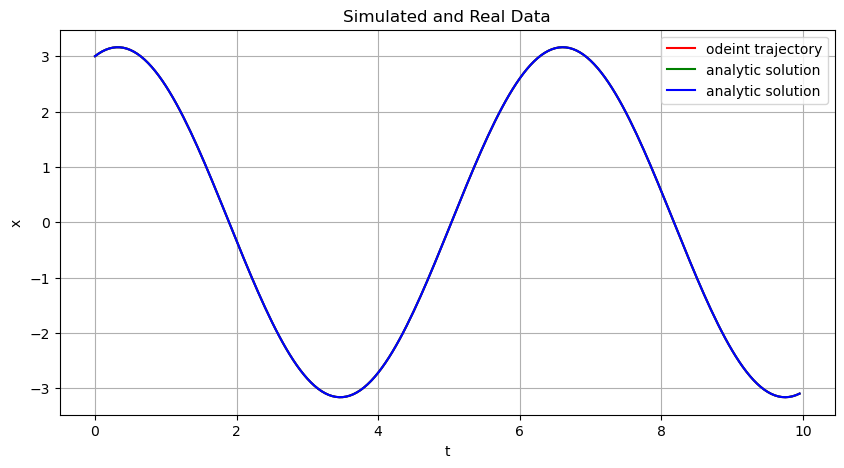

In [4]:
initial_condition = [1, 3]

k = 1
m = 1
omega0 = np.sqrt(k/m)
omega0_2 = k/m
print(omega0,omega0_2)
t = np.arange(0,10,0.05)
sigma = 0.25
sol_numerical = odeint(diffyqs, initial_condition, t, args=(omega0_2,)) # pass odeint the differential equation, initial condition, time array, and parameters
sol_analytic = analytic_sol(t,omega0,initial_condition)
sol_analytic_fancy = analytic_sol_fancy(t,omega0,initial_condition)
x_true = sol_analytic
# plot plot plot
plt.figure(figsize=(10,5))
plt.plot(t,sol_numerical[:,1], label = 'odeint trajectory',c = 'r') # to get the right part of the solution you have to do this weird transpose index thing
plt.plot(t,sol_analytic, label = "analytic solution", c = 'g')
plt.plot(t,sol_analytic_fancy, label = "analytic solution", c = 'b')
plt.title('Simulated and Real Data')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.grid()
plt.show()

In [6]:
log_likelihood(0)

-126995.24002489449

In [7]:
D = 1  

LB = np.full((1, D), -1000)  # Lower bounds
UB = np.full((1, D), 1000)  # Upper bounds

PLB = np.copy(LB)
PUB = np.copy(UB) 
PUB[0][0] =  10
PLB[0][0] = -10

x0 = 3 * np.ones((1, D))


print("LB:",LB,"PLB:",PLB,"PUB:",PUB,"UB:",UB,'x0:',x0)

LB: [[-1000]] PLB: [[-10]] PUB: [[10]] UB: [[1000]] x0: [[3.]]


In [8]:
vbmc = VBMC(log_likelihood, x0, LB, UB, PLB, PUB, prior = UniformBox(LB, UB)) # initialize VMBC object

vp, results = vbmc.optimize() # do optimization (might take a while)

Casting lower bounds to floating point.
Casting upper bounds to floating point.
Casting plausible lower bounds to floating point.
Casting plausible upper bounds to floating point.
Beginning variational optimization assuming EXACT observations of the log-joint.
 Iteration  f-count    Mean[ELBO]    Std[ELBO]    sKL-iter[q]   K[q]  Convergence  Action


     0         10       -7146.28        25.51   4816112.96        2        inf     start warm-up
     1         15      -14747.69      5110.51     28956.59        2        inf     
     2         20      -14309.25      6759.22       763.20        2   4.94e+04     
     3         25      -15790.19      5981.73      2360.79        2   1.04e+05     
     4         30      -15697.83      3122.58       511.81        2   2.78e+04     
     5         35      -15039.42      2853.45         0.90        2   1.17e+04     
     6         40      -15373.72       290.35         0.38        2   2.09e+03     
     7         45      -14715.25      4203.99         0.00        2   1.62e+04     
     8         50      -14413.14      5014.15         0.00        2   1.77e+04     trim data
     9         55          80.18         0.00   8737200.23        2   2.91e+08     
    10         60          80.21         0.00         0.00        2      0.194     
    11         65          80.19         0.00         

KeyboardInterrupt: 

3.0266526020464535


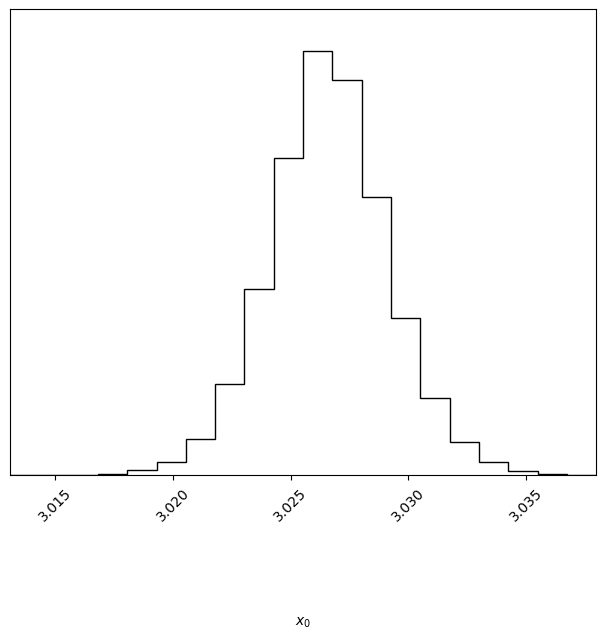

In [25]:
vp.plot();
print(vp.moments()[0,0])

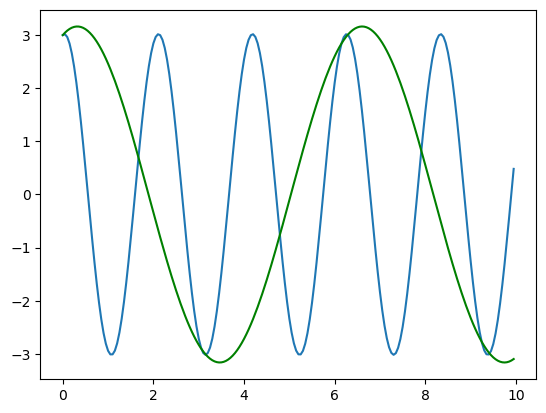

In [29]:
plt.plot(t,analytic_sol(t,vp.moments()[0,0],initial_condition))
plt.plot(t,sol_analytic, label = "analytic solution", c = 'g')

In [31]:
LB[0][0] = 0
PLB[0][0] = 0.5

vbmc = VBMC(log_likelihood, x0, LB, UB, PLB, PUB, prior = UniformBox(LB, UB)) # initialize VMBC object

vp, results = vbmc.optimize() # do optimization (might take a while)

Casting lower bounds to floating point.
Casting upper bounds to floating point.
Casting plausible lower bounds to floating point.
Casting plausible upper bounds to floating point.
vbmc:TooCloseBounds: For each variable, hard and plausible bounds should not be too close. Moving plausible bounds.
Beginning variational optimization assuming EXACT observations of the log-joint.
 Iteration  f-count    Mean[ELBO]    Std[ELBO]    sKL-iter[q]   K[q]  Convergence  Action


     0         10          43.74       421.98 294291151.82        2        inf     start warm-up
     1         15          80.90         0.00        13.27        2        inf     
     2         20          80.88         0.00         0.01        2      0.226     
     3         25          80.87         0.00         0.00        2       0.17     
     4         30          80.88         0.00         0.00        2     0.0599     
     5         35          80.89         0.00         0.00        2      0.192     
     6         40          80.89         0.00         0.01        2       0.31     end warm-up
     7         45          80.88         0.00         0.01        2      0.238     
     8         50          80.83         0.00         0.14        2       4.76     
     9         55          80.90         0.00         0.06        3       2.09     
    10         60          80.87         0.00         0.03        4       1.06     
    11         65          80.89         0.00       

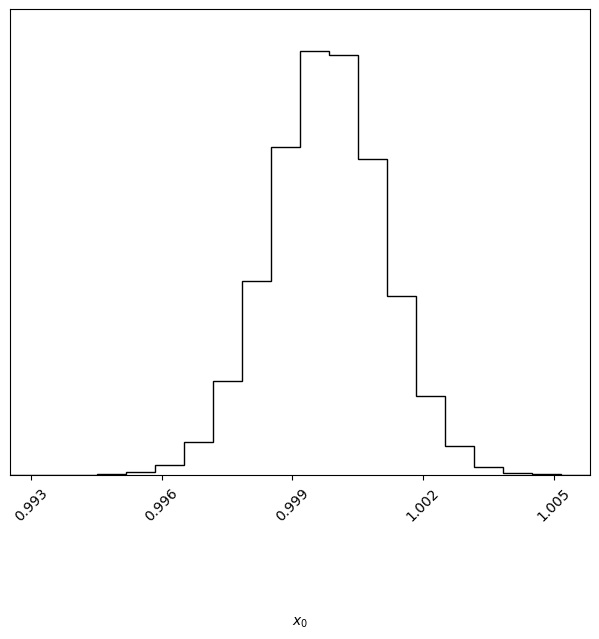

In [32]:
vp.plot();

best choice for a: 1.0


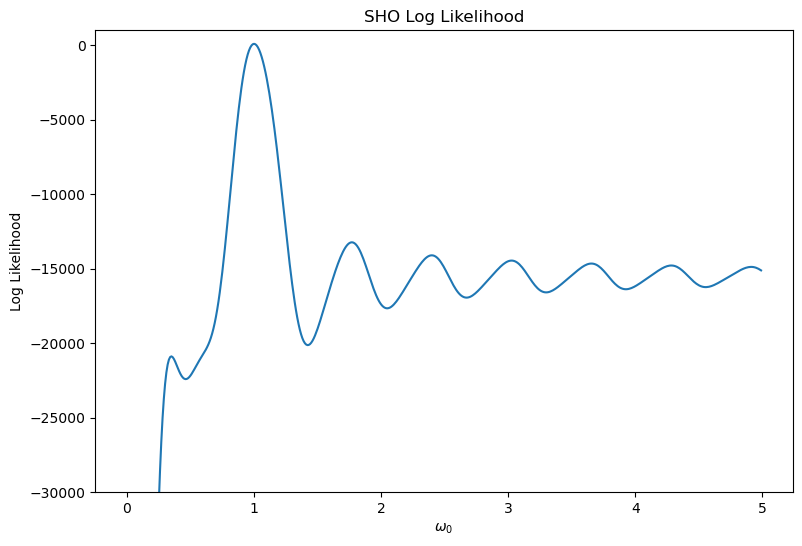

In [9]:
sols = []
sigma = 0.25
omegas = np.arange(0,5,0.01)
for omega in omegas:
    sols.append(log_likelihood(omega))
print("best choice for a:",omegas[np.argmax(np.array(sols))])
plt.figure(figsize=(9,6))
plt.plot(omegas,sols)
plt.title("SHO Log Likelihood")
plt.ylim(-30000,1000)
plt.xlabel(r"$\omega_0$")
plt.ylabel("Log Likelihood")
plt.show()

In [101]:
def log_likelihood(theta):
    omega0,x0 = theta
    if omega0 == 0.0:
        omega0 = 0.01
    else:
        pass
    initial_condition = [1,x0]
    sol = analytic_sol(t,omega0,initial_condition)
    return np.sum(np.log(1/(sigma* (2*np.pi)**0.5)) - (0.5/sigma**2) * (sol - x_true)**2)

D = 2

LB = np.full((1, D), -1000.0)  # Lower bounds
UB = np.full((1, D), 1000.0)  # Upper bounds
LB[0][0] = 0.0

PUB = np.copy(UB) 
PUB[0][0] = 10.0
PUB[0][1] = 10.0
PLB = np.copy(LB)
PLB[0][0] = 0.9
PLB[0][1] = -10.0

x0 = 3 * np.ones((1, D))

print("LB:",LB,"PLB:",PLB,"PUB:",PUB,"UB:",UB,'x0:',x0)

LB: [[    0. -1000.]] PLB: [[  0.9 -10. ]] PUB: [[10. 10.]] UB: [[1000. 1000.]] x0: [[3. 3.]]


In [102]:
vbmc = VBMC(log_likelihood, x0, LB, UB, PLB, PUB, prior = UniformBox(LB, UB)) # initialize VMBC object

vp, results = vbmc.optimize() # do optimization (might take a while)

vbmc:TooCloseBounds: For each variable, hard and plausible bounds should not be too close. Moving plausible bounds.
Beginning variational optimization assuming EXACT observations of the log-joint.
 Iteration  f-count    Mean[ELBO]    Std[ELBO]    sKL-iter[q]   K[q]  Convergence  Action
     0         10       -5876.44      1061.73  39611038.35        2        inf     start warm-up
     1         15       -2934.51       598.01      2573.76        2        inf     
     2         20        -223.15       136.71      4275.92        2    1.1e+05     
     3         25          70.31         0.73       217.52        2   6.11e+03     
     4         30          70.53         0.00         0.01        2      0.903     
     5         35          70.57         0.00         0.00        2      0.186     
     6         40          70.55         0.00         0.01        2      0.259     
     7         45          70.53         0.00         0.01        2      0.367     
     8         50          7

[[1.00001015 2.9995936 ]] 1.0 3


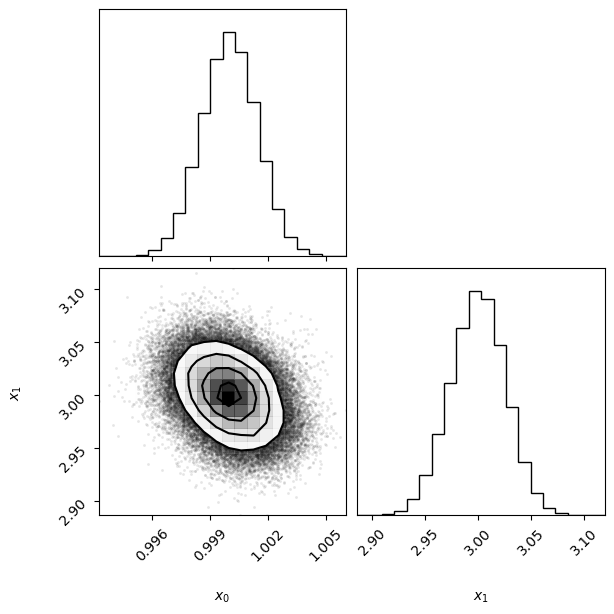

In [106]:
vp.plot();
print(vp.moments(), omega0,3)

# 2 BODY PROBLEM

In [128]:
def two_body_analytic_sol(phi,m,alpha,L,A,phi0):
    return 1 / (m * alpha / L**2 + A * np.cos(phi - phi0))

def two_body_log_likelihood(theta):
    A = theta
    sol = two_body_analytic_sol(phi,m,alpha,L,A,phi0)
    return np.sum(np.log(1/(sigma* (2*np.pi)**0.5)) - (0.5/sigma**2) * (sol - r_true)**2)

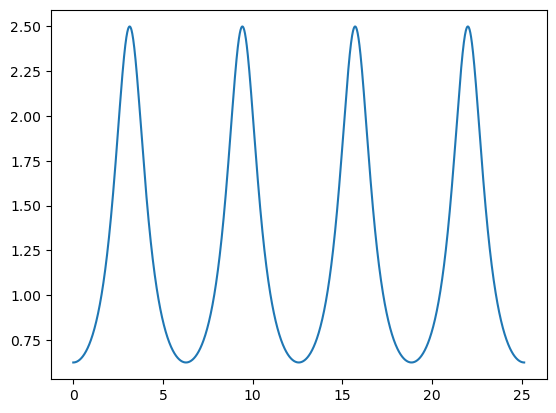

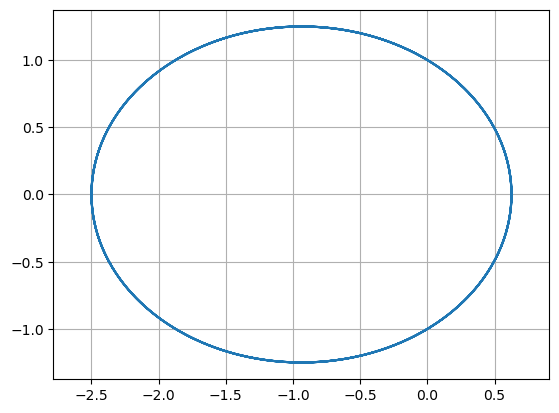

In [129]:
phi = np.arange(0,4* 2*np.pi,0.01)
m = 1
alpha = 1
L = 1
A = 0.6
phi0 = 0


r_true = two_body_analytic_sol(phi,m,alpha,L,A,phi0)

plt.plot(phi,r_true)
plt.show()
plt.plot(r_true * np.cos(phi), r_true * np.sin(phi))
plt.grid()
plt.axis("equal")
plt.show()

In [123]:
As = np.arange(0,0.9,0.01)
sigma = 0.01

lls = []
for A in As:
    lls.append(two_body_log_likelihood(A))
print("best choice for a:",As[np.argmax(np.array(lls))])
plt.figure(figsize=(9,6))
plt.plot(As,lls)
plt.title("2 Body Problem Log Likelihood")
print(np.array(lls).max())
plt.ylim(-1e7,5e5)
plt.ylabel("Log Likelihood")
plt.show()

TypeError: cannot unpack non-iterable numpy.float64 object

In [82]:
LB = np.full((1, D), 0.0)  # Lower bounds
UB = np.full((1, D), 1.0)  # Upper bounds

PLB = np.copy(LB)
PUB = np.copy(UB) 
PUB[0][0] =  0.9
PLB[0][0] = 0.1

x0 = np.atleast_2d(0.5)

print("LB:",LB,"PLB:",PLB,"PUB:",PUB,"UB:",UB,'x0:',x0)

vbmc = VBMC(two_body_log_likelihood, x0, LB, UB, PLB, PUB, prior = UniformBox(LB, UB)) # initialize VMBC object

vp, results = vbmc.optimize() # do optimization (might take a while)

LB: [[0.]] PLB: [[0.1]] PUB: [[0.9]] UB: [[1.]] x0: [[0.5]]
Beginning variational optimization assuming EXACT observations of the log-joint.
 Iteration  f-count    Mean[ELBO]    Std[ELBO]    sKL-iter[q]   K[q]  Convergence  Action


     0         10    12800850.92  51408595.19   1431131.32        2        inf     start warm-up


c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 2. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)


     1         15    -5167221.21   1112907.12      3973.73        2        inf     


c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 0. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)
c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 5. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)


     2         20        9269.91        19.72  36140567.02        2   1.22e+09     


c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 1. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)
c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 6. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)


     3         25        9258.66         0.72         1.05        2         75     


c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 3. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)
c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 4. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)
c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 7. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)


     4         30        9258.73         0.94         0.01        2       3.59     
     5         35        9258.58         1.07         0.00        2       4.19     
     6         40        9258.53         1.69         0.00        2       5.88     end warm-up
     7         45        9258.68         0.00         0.00        2       0.57     
     8         50        9258.70         0.00         0.01        2       0.51     
     9         55        9258.71         0.00         0.00        5     0.0903     
    10         60        9258.68         0.00         0.03        8      0.994     
    11         65        9258.65         0.00         0.02        8      0.725     
    12         70        9258.38         0.00         0.12        8       5.01     
    13         75        9258.51         0.00         0.80        8       27.1     
    14         80        9258.69         0.00         0.26        8       9.19     
    15         85        9258.67         0.00         0.01       

[[0.6000291]]


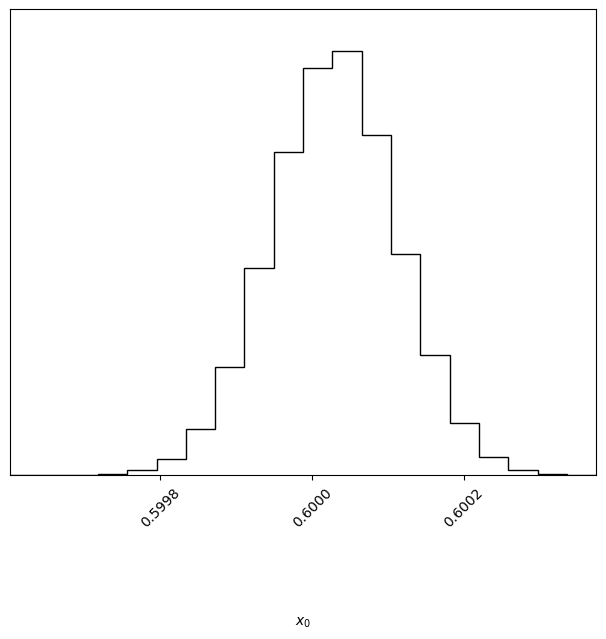

In [84]:
vp.plot();
print(vp.moments())

In [168]:
m = 1
alpha = 1
L = 1
A = 0.6
B = 10
phi0 = 0
sigma = 0.05


def two_body_analytic_sol(phi,A,B,phi0 = 0):
    return 1 / (B + A * np.cos(phi - phi0))

r_true = two_body_analytic_sol(phi,A,B,phi0)

def two_body_log_likelihood(theta):
    A, B = theta
    sol = two_body_analytic_sol(phi,A,B,phi0)
    return np.sum(np.log(1/(sigma * (2*np.pi)**0.5)) - (0.5/sigma**2) * (sol - r_true)**2)


D = 2
LB = np.full((1, D), 0.001)  # Lower bounds
UB = np.full((1, D), 100.0)  # Upper bounds
LB[0][0] = 0.0
LB[0][1] = 1.0
UB[0][0] = 0.99

PUB = np.copy(UB) 
PUB[0][0] = 0.9
PUB[0][1] = 30.0
PLB = np.copy(LB)
PLB[0][0] = 0.1
PLB[0][1] = 2.0

x0 = 3 * np.ones((1, D))
x0[0][0] = 0.4
#prior = SplineTrapezoidal(LB, PLB, PUB, UB)
print("LB:",LB,"PLB:",PLB,"PUB:",PUB,"UB:",UB,'x0:',x0)

LB: [[0. 1.]] PLB: [[0.1 2. ]] PUB: [[ 0.9 30. ]] UB: [[  0.99 100.  ]] x0: [[0.4 3. ]]


In [169]:
vbmc = VBMC(two_body_log_likelihood, x0, LB, UB, PLB, PUB, prior = SplineTrapezoidal(LB, PLB, PUB, UB) ) # initialize VMBC object

vp, results = vbmc.optimize() # do optimization (might take a while)

Beginning variational optimization assuming EXACT observations of the log-joint.
 Iteration  f-count    Mean[ELBO]    Std[ELBO]    sKL-iter[q]   K[q]  Convergence  Action


     0         10        5512.14      1205.69 1633899547973.71        2        inf     start warm-up
     1         15        5314.11       420.75       247.04        2        inf     


c:\Users\walki\.conda\envs\bpe\Lib\site-packages\cma\evolution_strategy.py:3829: RuntimeWarning: invalid value encountered in scalar subtract
  current_fitness_range < opts['tolfunrel'] * (es.fit.median0 - es.fit.median_min),
c:\Users\walki\.conda\envs\bpe\Lib\site-packages\cma\evolution_strategy.py:3829: RuntimeWarning: invalid value encountered in scalar multiply
  current_fitness_range < opts['tolfunrel'] * (es.fit.median0 - es.fit.median_min),


     2         20        8016.16      3676.22         6.65        2   2.14e+04     
     3         25        5366.02       273.97         3.60        2   9.83e+03     
     4         30        5231.46        56.18         2.76        2        701     
     5         35        5215.46         0.67         6.66        2        213     
     6         40        5651.14       407.50        21.02        2   3.31e+03     
     7         45        5212.24         0.40        18.31        2    1.9e+03     
     8         50        5214.59         0.00         1.05        2       32.7     
     9         55        5214.59         0.00         0.00        2     0.0231     
    10         60        5214.58         0.00         0.00        2     0.0461     
    11         65        5214.57         0.00         0.00        2     0.0588     end warm-up
    12         70        5214.57         0.00         0.01        2       0.34     
    13         75        5214.58         0.00         0.00       

[[ 0.59690666 10.00508707]]


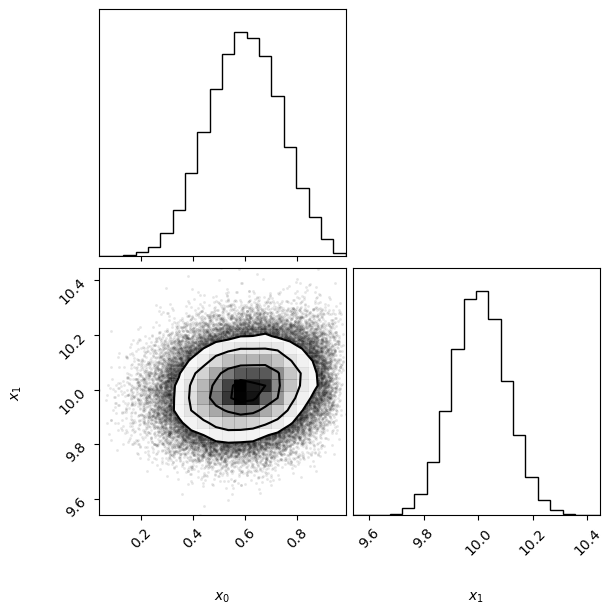

In [170]:
vp.plot();
print(vp.moments())

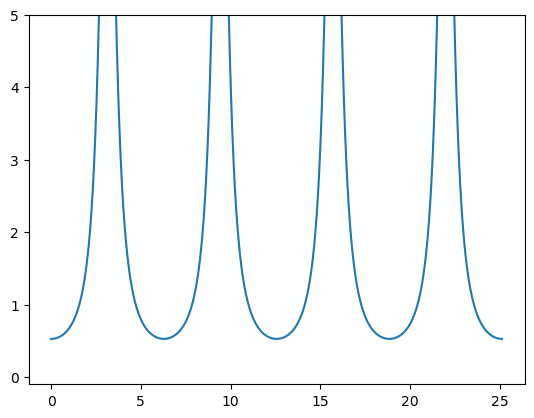

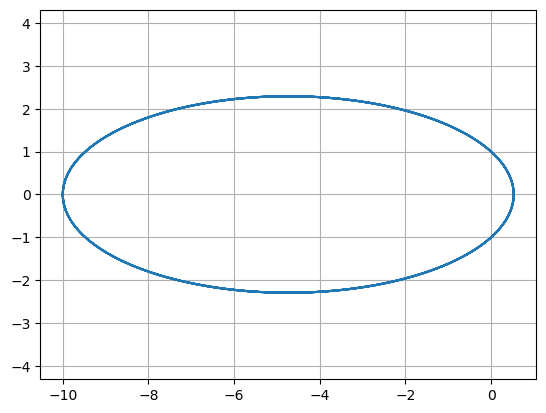

In [154]:
A = 0.9
B = 1
r = two_body_analytic_sol(phi,A,B,phi0)

plt.plot(phi,r)
plt.ylim(-0.1,5)
plt.show()
plt.plot(r * np.cos(phi), r * np.sin(phi))
plt.grid()
plt.axis("equal")
plt.show()